<a href="https://colab.research.google.com/github/sudhav2024/Machine-Learning/blob/main/Multi_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


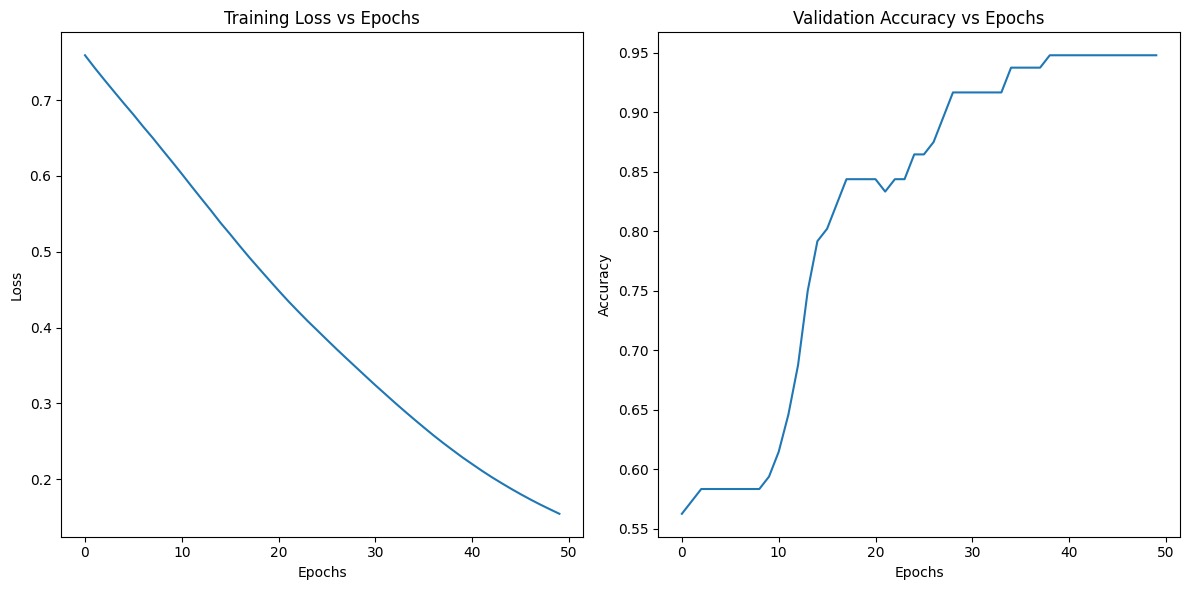

Activation: relu
Confusion Matrix:
[[224   5]
 [ 32 151]]
True Negatives: 224, False Positives: 5, False Negatives: 32, True Positives: 151
Accuracy: 0.9102
Precision: 0.9679
Recall: 0.8251
F1-Score: 0.8909

--------------------------------------------------



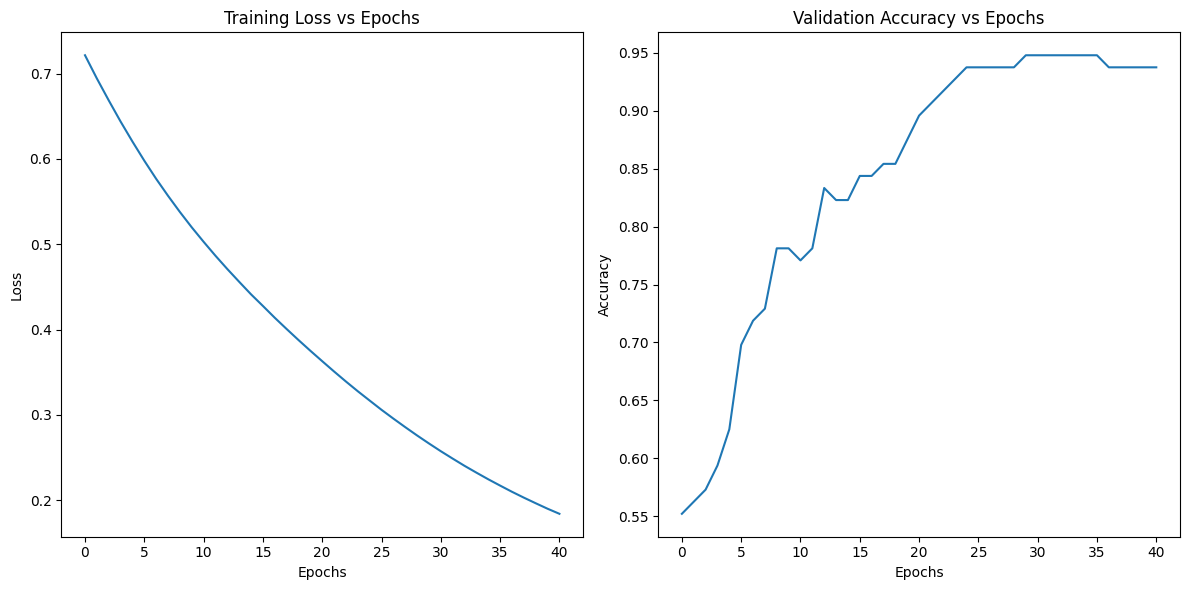

Activation: tanh
Confusion Matrix:
[[224   5]
 [ 22 161]]
True Negatives: 224, False Positives: 5, False Negatives: 22, True Positives: 161
Accuracy: 0.9345
Precision: 0.9699
Recall: 0.8798
F1-Score: 0.9226

--------------------------------------------------



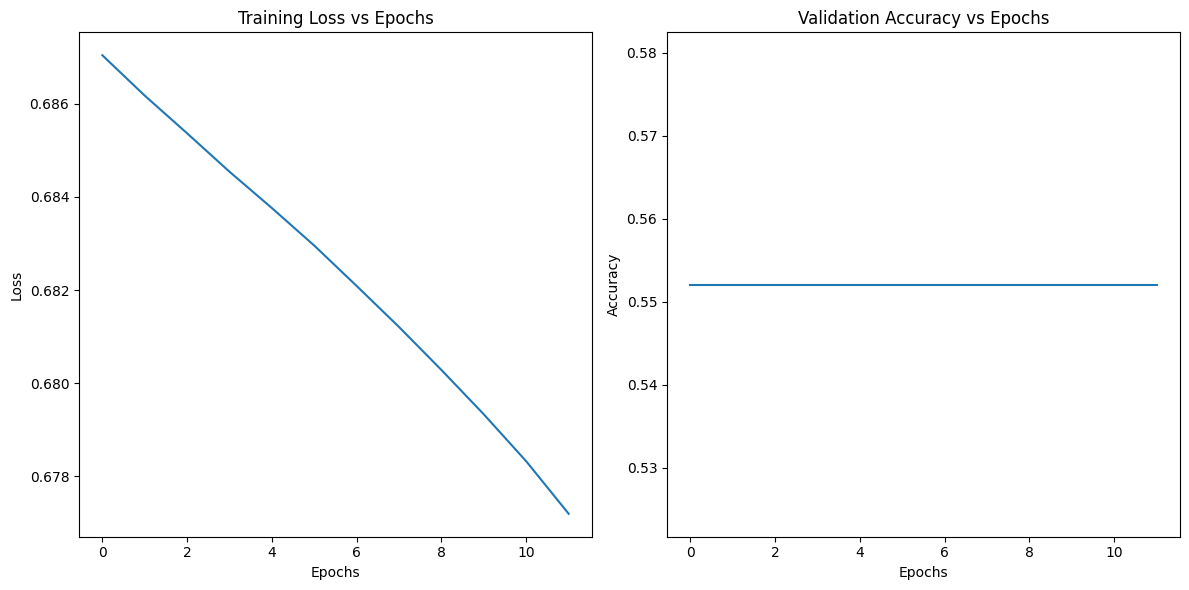

Activation: logistic
Confusion Matrix:
[[229   0]
 [183   0]]
True Negatives: 229, False Positives: 0, False Negatives: 183, True Positives: 0
Accuracy: 0.5558
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000

--------------------------------------------------



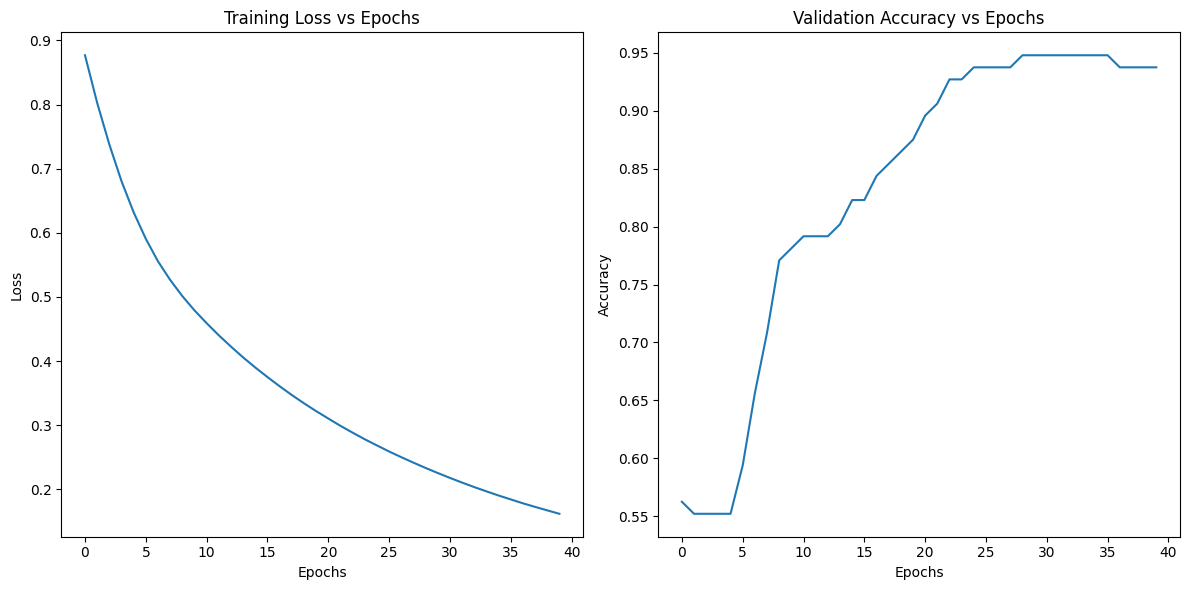

Activation: identity
Confusion Matrix:
[[222   7]
 [ 25 158]]
True Negatives: 222, False Positives: 7, False Negatives: 25, True Positives: 158
Accuracy: 0.9223
Precision: 0.9576
Recall: 0.8634
F1-Score: 0.9080

--------------------------------------------------



In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BankNoteAuthentication.csv")

print(df.head())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def train_and_evaluate_mlp(activation_function):
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), solver='adam', activation=activation_function,
                        max_iter=500, early_stopping=True, validation_fraction=0.1, random_state=42)

    mlp.fit(X_train, y_train)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(mlp.loss_curve_)
    plt.title('Training Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(mlp.validation_scores_)
    plt.title('Validation Accuracy vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    y_pred = mlp.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"Activation: {activation_function}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print("\n" + "-"*50 + "\n")

activation_functions = ['relu', 'tanh', 'logistic', 'identity']

for activation in activation_functions:
    train_and_evaluate_mlp(activation)
